In [1]:
%matplotlib notebook

In [2]:
import os
import numpy as np
from glob import glob
import pickle
import ipywidgets as widgets
from IPython.display import display
from functools import partial
import re
import matplotlib.pyplot as plt

#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.layouts import row
regex_nrn = re.compile(r'NEURON\s*\{(\s*[\w+,]\s*)*\s\}?', re.MULTILINE)
regex_state = re.compile(r'STATE\s*\{(\s*([\w+,:])\s*)*\s*\}?', re.MULTILINE)

<IPython.core.display.Javascript object>


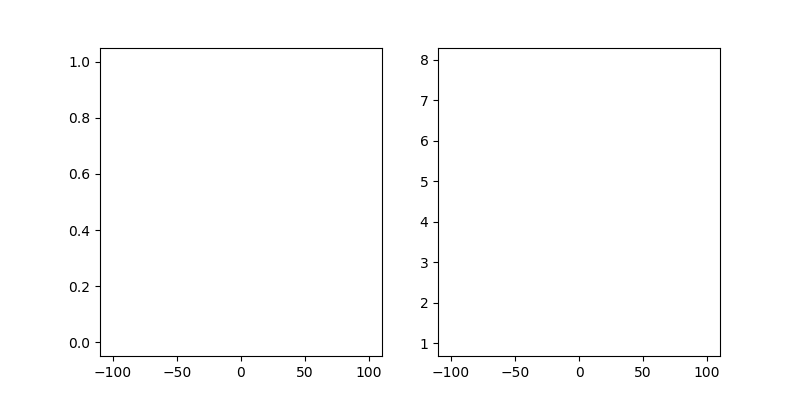

Widget Javascript not detected.  It may not be installed or enabled properly.


TraitError: Could not decode 'TITLE Kdrslow.mod  \n \nCOMMENT\n\tSlow delayed rectifier K+ currents: Storm, 1990:\n\t(3) IK activates slowly (time constant, 20\xe2\x80\x9360 ms) in response to depolarizations positive to -40 mV and inactivates (about 5s) at -80 to -40 mV; it probably participates in spike repolarization.\n\t(4) IM activates slowly (about 50 ms) positive to -60 mV and does not inactivate; it tends to attenuate excitatory inputs, it reduces the firing rate during maintained depolarization (adaptation) and contributes to the medium after-hyperpolarization (mAHP).\n\tAradi shifted the voltage dependence by -12 mV - don\'t know why\n\nNote: there is some type of warning during compilation of this mechanism:\nichan2.c: In function \'initmodel\':\nichan2.c:488: warning: \'return\' with a value, in function returning void\nProbably due to the VERBATIM blocks setting it to return 0. I have removed them.\nNot sure what their purpose was.\nENDCOMMENT\n\nVERBATIM\n#include <stdlib.h> /* \tInclude this library so that the following\n\t\t\t\t\t\t(innocuous) warning does not appear:\n\t\t\t\t\t\t In function \'_thread_cleanup\':\n\t\t\t\t\t\t warning: incompatible implicit declaration of \n\t\t\t\t\t\t          built-in function \'free\'  */\nENDVERBATIM\n \nUNITS {\n\t(mA) =(milliamp)\n\t(mV) =(millivolt)\n\t(uF) = (microfarad)\n\t(molar) = (1/liter)\n\t(nA) = (nanoamp)\n\t(mM) = (millimolar)\n\t(um) = (micron)\n\tFARADAY = 96520 (coul)\n\tR = 8.3134\t(joule/degC)\n}\n \nNEURON { \n\tSUFFIX ch_Kdrslow \n\tUSEION k READ ek WRITE ik  VALENCE 1\n\tRANGE g, gmax, ninf, ntau, ik\n\tRANGE myi\n\tTHREADSAFE\n}\n \nPARAMETER {\n\tv (mV) \n\tcelsius (degC) : temperature - set in hoc; default is 6.3\n\tdt (ms) \n\n\tek  (mV)\n\tgmax = 1.0 (mho/cm2)\n}\n \nSTATE {\n\tn\n}\n \nASSIGNED {\t\t     \n\tg (mho/cm2)\n\tik (mA/cm2)\n\tninf\n\tntau (ms)\n\tnexp\n\tmyi (mA/cm2)\n} \n\nBREAKPOINT {\n\tSOLVE states\n\tg = gmax*n*n*n*n\n\tik = g*(v-ek)\n\tmyi = ik\n}\n\nUNITSOFF\n \nINITIAL {\n\ttrates(v)\n\n\tn = ninf\n}\n\nPROCEDURE states() {\t:Computes state variables m, h, and n \n\ttrates(v)\t:      at the current v and dt.       \n\tn = n + nexp*(ninf-n)\n}\n \nLOCAL q10\nPROCEDURE rates(v) {  :Computes rate and other constants at current v.\n                      :Call once from HOC to initialize inf at resting v.\n\tLOCAL  alpha, beta, sum\n\tq10 = 3^((celsius - 34)/10)\n\t:q10 = 3^((celsius - 6.3)/10)\n\n\t:"ns" sKDR activation system\n\talpha = -0.028*vtrap((v+65-35),-6)\n\tbeta = 0.1056/exp((v+65-10)/40)\n\tsum = alpha+beta        \n\tntau = 1/sum\n\tninf = alpha/sum\n\t\n}\n \nPROCEDURE trates(v) {  :Computes rate and other constants at current v.\n                      :Call once from HOC to initialize inf at resting v.\n\tLOCAL tinc\n\tTABLE  ninf, nexp, ntau\n\tDEPEND dt, celsius\n\tFROM -100 TO 100 WITH 200\n\t\t\t\t\t\t\t   \n\trates(v)\t: not consistently executed from here if usetable_hh == 1\n\t: so don\'t expect the tau values to be tracking along with\n\t: the inf values in hoc\n\n\ttinc = -dt * q10\n\tnexp = 1 - exp(tinc/ntau)\n}\n \nFUNCTION vtrap(x,y) {  :Traps for 0 in denominator of rate eqns.\n        if (fabs(x/y) < 1e-6) {\n                vtrap = y*(1 - x/y/2)\n        }else{  \n                vtrap = x/(exp(x/y) - 1)\n        }\n}\n \nUNITSON\n\n' for unicode trait 'value' of a Textarea instance.

OSError: [Errno 2] No such file or directory: 'icg-channels-K/3682_hh3.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/114685_AXNODE75.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/149415_kdrmt.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/184325_K_T.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/135902_kdrpr.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/184350_Im_v2.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/149737_kslow.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/127388_pGPeA.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/139654_kml.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/143719_kdr.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/83344_kv.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/6763_leak.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/184348_K_T.mod'

OSError: [Errno 2] No such file or directory: 'icg-channels-K/116862_kdr2.mod'

In [3]:
class Counter:
    def __init__(self, initial=0):
        self.value = initial

    def increment(self, amount=1):
        self.value += amount
        return self.value

    def decrement(self, amount=1):
        self.value -= amount
        return self.value
    
    def set_value(self, amount):
        self.value = amount
        return self.value
    
    def __iter__(self, sentinal=False):
        return iter(self.increment, sentinal)

def plot_figure(ax, rate_files):
    for rate_file in rate_files:
        with open(rate_file, 'r') as handle:
            data = np.loadtxt(handle)
            x = data[:, 0]
            y = data[:, 1]
            ax.plot(x, y, label=rate_file[:-8], marker='.')
    ax.legend()
    return ax

def refresh_figure(fig, foldername, axs):
    for ax in axs:
        ax.clear()
    fig.canvas.draw_idle()
    os.chdir(sub_channel+'/'+foldername)
    with open(glob('*.mod')[0], 'r') as handle:
        all_mod = handle.read()
        txt_area_mod.value = all_mod
        nrn_txt = regex_nrn.search(all_mod).group()
        state_reg = regex_state.search(all_mod)
        if not state_reg:
            state_txt = ''
        else:
            state_txt = state_reg.group()
        txt_area_test.value = str(nrn_txt + '\n' + state_txt)
    files = glob('*.dat')
    if not files: 
        pass
    else:
        rate_files = glob('*.inf.dat')
        rate_files.sort()
        plot_figure(axs[0], rate_files)
        axs[0].set_xlabel('Potential')
        axs[0].set_ylabel('Prob.opening')
        axs[0].set_title(foldername)
        tau_files = glob('*.tau.dat')
        tau_files.sort()
        plot_figure(axs[1], tau_files)
        axs[1].set_xlabel('Potential')
        #axs[1].set_ylabel('ms')
    os.chdir('../..')

counter = Counter()
sub_channel = 'icg-channels-K'
all_channels = os.listdir(os.path.join('.', sub_channel))

#output_notebook()
#rates_fig = figure(width=400, height=400, tools="pan,box_zoom,reset,save", title="Rates",
#                   x_axis_label='Holding potential', y_axis_label='Prob. channel open')
#tau_fig = figure(width=400, height=400, tools="pan,box_zoom,reset,save", title="Tau",
#                   x_axis_label='Holding potential', y_axis_label='Prob. channel open')

fig = plt.figure(figsize=(8, 4))
rates_ax = fig.add_subplot(121)
tau_ax = fig.add_subplot(122)




next_button = widgets.Button(description='Next Channel',
                             disabled=False, button_style='')
prev_button = widgets.Button(description='Prev Channel',
                             disabled=False, button_style='')
txt_box = widgets.Text(value=str(all_channels[0]), description='Channel Name:',
                       disabled=True)
txt_area_mod = widgets.Textarea(value='Hello World',
                        disabled=False, layout=widgets.Layout(width='550px', height='200px'))
txt_area_test = widgets.Textarea(value='Hello World',
                            disabled=False, layout=widgets.Layout(width='250px', height='200px'))

refresh_figure(fig, all_channels[0], [rates_ax, tau_ax])
plt.show()

def on_nxt_btn_clicked(counter, b):
    txt_box.value = all_channels[counter.increment()]
    refresh_figure(fig, txt_box.value, [rates_ax, tau_ax])
    fig.canvas.draw()
def on_prev_btn_clicked(counter, b):
    txt_box.value = all_channels[counter.decrement()]
    refresh_figure(fig, txt_box.value, [rates_ax, tau_ax])
    fig.canvas.draw()
    
next_button.on_click(partial(on_nxt_btn_clicked, counter))
prev_button.on_click(partial(on_prev_btn_clicked, counter))
items = [prev_button, txt_box, next_button]

widgets.HBox(items)

In [4]:
widgets.HBox([txt_area_mod, txt_area_test])

Widget Javascript not detected.  It may not be installed or enabled properly.
